# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [7]:
city = "london"
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&q={0}&appid={1}".format(city, weather_api_key)
response = requests.get(url)
data = response.json()
data
weather_data = {
    "City": city,
    "Lat": data["coord"]["lat"],
    "Lon": data["coord"]["lon"],
    "Max Temp":data["main"]["temp_max"] ,
    "Humidity":data["main"]["humidity"],
    "Cloudiness":data["clouds"]["all"] , 
    "Wind Speed":data["wind"]["speed"] ,
    "Country":data["sys"]["country"] ,
    "Date":data["dt"] ,
}
weather_data

{'City': 'london',
 'Lat': 51.5085,
 'Lon': -0.1257,
 'Max Temp': 56.98,
 'Humidity': 82,
 'Cloudiness': 0,
 'Wind Speed': 1.01,
 'Country': 'GB',
 'Date': 1622509723}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
print("Processing Data")

city_data = []

for i, city in enumerate(cities):
    try: 
        url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&q={0}&appid={1}".format(city, weather_api_key)
        response = requests.get(url)
        data = response.json()
        weather_data = {
            "City": city,
            "Lat": data["coord"]["lat"],
            "Lon": data["coord"]["lon"],
            "Max Temp":data["main"]["temp_max"] ,
            "Humidity":data["main"]["humidity"],
            "Cloudiness":data["clouds"]["all"] , 
            "Wind Speed":data["wind"]["speed"] ,
            "Country":data["sys"]["country"] ,
            "Date":data["dt"] ,
        }
        city_data.append(weather_data)
        print("Processing Record {} of Set {} | {}".format(i % 50 + 1, i // 50 + 1, city))
    except:
        print("City {} not found. Skipping...".format(city))


Processing Data
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | mehamn
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | pangnirtung
City sinkat not found. Skipping...
Processing Record 7 of Set 1 | shitkino
Processing Record 8 of Set 1 | vuktyl
Processing Record 9 of Set 1 | coldwater
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | berekum
Processing Record 13 of Set 1 | mayor pablo lagerenza
Processing Record 14 of Set 1 | tevaitoa
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | solnechnyy
Processing Record 17 of Set 1 | yulara
Processing Record 18 of Set 1 | chifeng
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | fergus falls
Processing Record 22 of Set 1 | haverfordwest
Processing Record 23 of Set 1 | fortuna
Processing Record 24 of Set 1 | arrai

Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | ubata
Processing Record 3 of Set 5 | chapais
Processing Record 4 of Set 5 | marsabit
Processing Record 5 of Set 5 | whyalla
Processing Record 6 of Set 5 | puerto escondido
Processing Record 7 of Set 5 | nome
Processing Record 8 of Set 5 | burnie
Processing Record 9 of Set 5 | ponta do sol
Processing Record 10 of Set 5 | eenhana
Processing Record 11 of Set 5 | san quintin
Processing Record 12 of Set 5 | seinajoki
Processing Record 13 of Set 5 | san ramon
Processing Record 14 of Set 5 | cabo san lucas
Processing Record 15 of Set 5 | rocha
Processing Record 16 of Set 5 | brae
Processing Record 17 of Set 5 | sao filipe
Processing Record 18 of Set 5 | melioratorov
Processing Record 19 of Set 5 | padang
Processing Record 20 of Set 5 | chuy
Processing Record 21 of Set 5 | leningradskiy
Processing Record 22 of Set 5 | ambon
Processing Record 23 of Set 5 | oleksandrivka
Processing Record 24 of Set 5 | saltpond
Processing Re

Processing Record 2 of Set 9 | coihaique
Processing Record 3 of Set 9 | slave lake
Processing Record 4 of Set 9 | namatanai
Processing Record 5 of Set 9 | missoula
Processing Record 6 of Set 9 | abu samrah
Processing Record 7 of Set 9 | makaryev
Processing Record 8 of Set 9 | digri
Processing Record 9 of Set 9 | namibe
Processing Record 10 of Set 9 | conde
Processing Record 11 of Set 9 | caravelas
Processing Record 12 of Set 9 | mareeba
Processing Record 13 of Set 9 | obzor
Processing Record 14 of Set 9 | kabanjahe
Processing Record 15 of Set 9 | devils lake
Processing Record 16 of Set 9 | arcos
Processing Record 17 of Set 9 | union
City dujuma not found. Skipping...
Processing Record 19 of Set 9 | turukhansk
Processing Record 20 of Set 9 | sturgis
Processing Record 21 of Set 9 | noumea
Processing Record 22 of Set 9 | montalban
Processing Record 23 of Set 9 | rafai
Processing Record 24 of Set 9 | maceio
Processing Record 25 of Set 9 | pa sang
Processing Record 26 of Set 9 | quatre coco

Processing Record 50 of Set 12 | hastings
Processing Record 1 of Set 13 | xacmaz
Processing Record 2 of Set 13 | la romana
Processing Record 3 of Set 13 | beloha
Processing Record 4 of Set 13 | denpasar
Processing Record 5 of Set 13 | te anau
Processing Record 6 of Set 13 | talnakh
Processing Record 7 of Set 13 | puerto leguizamo
Processing Record 8 of Set 13 | kaniama
City solsvik not found. Skipping...
Processing Record 10 of Set 13 | hami
Processing Record 11 of Set 13 | dunedin
City shchelyayur not found. Skipping...
Processing Record 13 of Set 13 | muros
City shkotovo-26 not found. Skipping...
Processing Record 15 of Set 13 | soyo
Processing Record 16 of Set 13 | herne bay
Processing Record 17 of Set 13 | aykhal
Processing Record 18 of Set 13 | tiarei
Processing Record 19 of Set 13 | carnduff
Processing Record 20 of Set 13 | ketchikan
Processing Record 21 of Set 13 | sheffield
Processing Record 22 of Set 13 | jumla
Processing Record 23 of Set 13 | yenagoa
Processing Record 24 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
city_data = pd.DataFrame(city_data)
city_data.to_csv(output_data_file)
city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,49.48,76,35,2.93,NZ,1622509855
1,jamestown,42.0970,-79.2353,58.32,54,1,5.75,US,1622509828
2,mehamn,71.0357,27.8492,41.18,96,100,4.03,NO,1622509855
3,busselton,-33.6500,115.3333,52.09,84,50,6.08,AU,1622509856
4,pangnirtung,66.1451,-65.7125,28.49,92,73,4.05,CA,1622509856


In [10]:
city_data.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,20.793214,15.587273,65.235972,70.259194,57.451839,7.410508,1.622510e+09
std,33.290560,91.296231,15.509278,21.415261,40.441281,5.027271,7.145136e+01
min,-54.800000,-179.166700,24.330000,6.000000,0.000000,0.000000,1.622510e+09
25%,-7.094300,-65.748850,54.130000,59.500000,13.000000,3.440000,1.622510e+09
50%,25.155800,18.944500,66.000000,75.000000,75.000000,5.930000,1.622510e+09
75%,49.991750,96.749950,77.630000,85.000000,100.000000,10.660000,1.622510e+09
max,78.218600,179.316700,104.320000,100.000000,100.000000,24.180000,1.622510e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
drop_index = city_data[city_data["Humidity"] > 100].index
drop_index

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data = city_data.drop(drop_index, inplace=False)
city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,49.48,76,35,2.93,NZ,1622509855
1,jamestown,42.0970,-79.2353,58.32,54,1,5.75,US,1622509828
2,mehamn,71.0357,27.8492,41.18,96,100,4.03,NO,1622509855
3,busselton,-33.6500,115.3333,52.09,84,50,6.08,AU,1622509856
4,pangnirtung,66.1451,-65.7125,28.49,92,73,4.05,CA,1622509856


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

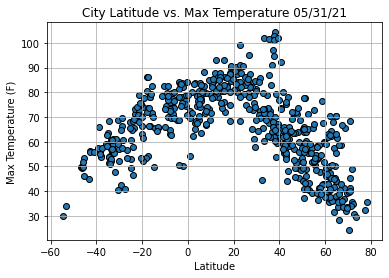

In [13]:
plt.scatter(x=city_data["Lat"],
            y=city_data["Max Temp"],
            edgecolor="black",
            label="Cities"
           )
plt.title("City Latitude vs. Max Temperature {}".format(time.strftime("%x")))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/lat_vs_temp.png")

plt.show()

## Latitude vs. Humidity Plot

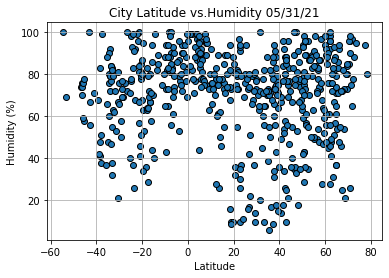

In [14]:
plt.scatter(x=city_data["Lat"],
            y=city_data["Humidity"],
            edgecolor="black",
            label="Cities"
           )
plt.title("City Latitude vs.Humidity {}".format(time.strftime("%x")))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat_vs_humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

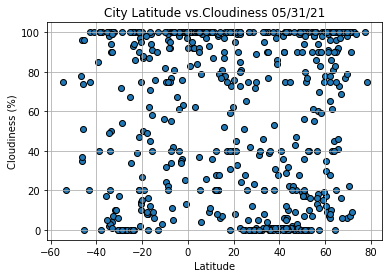

In [15]:
plt.scatter(x=city_data["Lat"],
            y=city_data["Cloudiness"],
            edgecolor="black",
            label="Cities"
           )
plt.title("City Latitude vs.Cloudiness {}".format(time.strftime("%x")))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat_vs_cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

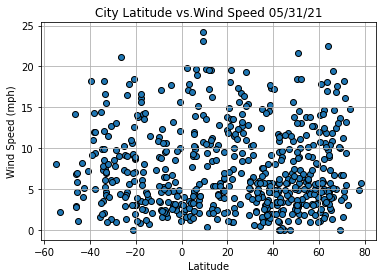

In [16]:
plt.scatter(x=city_data["Lat"],
            y=city_data["Wind Speed"],
            edgecolor="black",
            label="Cities"
           )
plt.title("City Latitude vs.Wind Speed {}".format(time.strftime("%x")))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat_vs_wind speed.png")

plt.show()

## Linear Regression

In [17]:
def linear_regression(x, y, x_title, y_title, text_coordinates):
    (m, b, r, p, err) = linregress(x, y)
    regress_value = x * m + b
    line_eq = "y = {}x + {}".format(round(m , 2), round(b, 2))
    
    plt.scatter(x, y)
    plt.plot(x, regress_value, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=16, color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    print("The R-value is {}".format(r ** 2))
    plt.show()
    

In [18]:
northern_data = city_data.loc[city_data["Lat"] >= 0]
southern_data = city_data.loc[city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-value is 0.5459580742076083


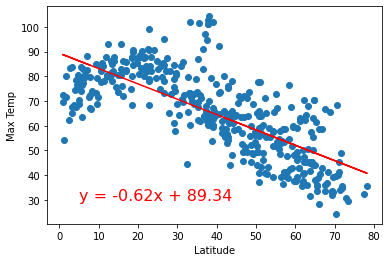

In [29]:
linear_regression(northern_data["Lat"], northern_data["Max Temp"], "Latitude", "Max Temp", (5, 30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-value is 0.5551530839292727


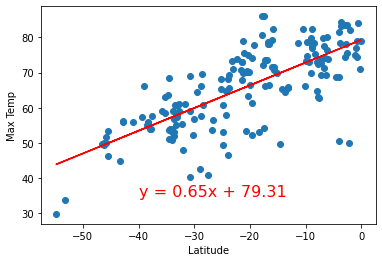

In [30]:
linear_regression(southern_data["Lat"], southern_data["Max Temp"], "Latitude", "Max Temp", (-40, 35))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-value is 0.003055220611384627


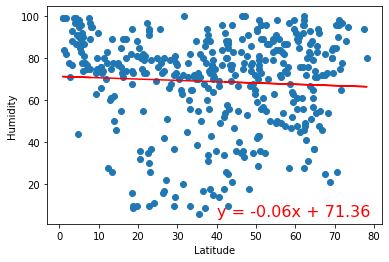

In [21]:
linear_regression(northern_data["Lat"], northern_data["Humidity"], "Latitude", "Humidity", (40, 5))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-value is 0.06937331443603692


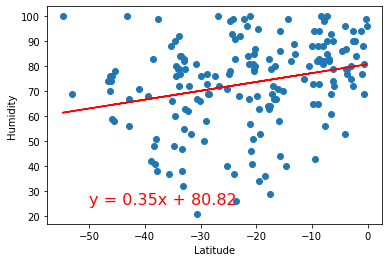

In [22]:
linear_regression(southern_data["Lat"], southern_data["Humidity"], "Latitude", "Humidity", (-50, 25))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-value is 0.001899845939408734


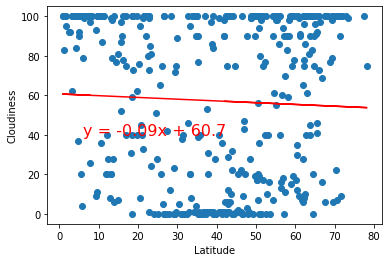

In [23]:
linear_regression(northern_data["Lat"], northern_data["Cloudiness"], "Latitude", "Cloudiness", (6, 40))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-value is 0.014935329377802292


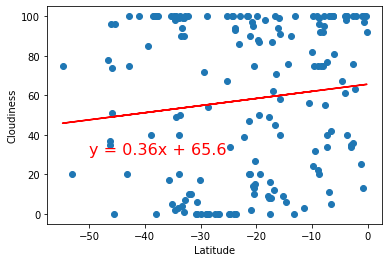

In [24]:
linear_regression(southern_data["Lat"], southern_data["Cloudiness"], "Latitude", "Cloudiness", (-50, 30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-value is 0.003652629643040534


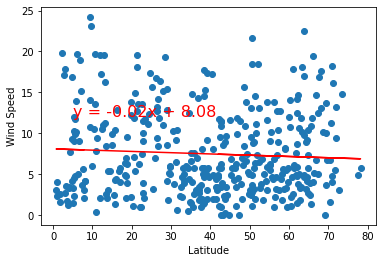

In [25]:
linear_regression(northern_data["Lat"], northern_data["Wind Speed"], "Latitude", "Wind Speed", (5, 12))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-value is 0.009607036178566576


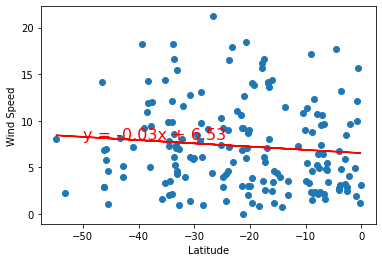

In [26]:
linear_regression(southern_data["Lat"], southern_data["Wind Speed"], "Latitude", "Wind Speed", (-50, 8))